P3 assignment Cartopy generated maps

In [1]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import cartopy.io.shapereader as shpreader
from glob import glob
import xarray as xr
import matplotlib.patheffects as path_effects

In [2]:
def load_bathymetry(zip_file_url, bbox):
    """Read zip file from Natural Earth containing bathymetry shapefiles"""
    # Download and extract shapefiles
    import io
    import zipfile

    import requests
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("ne_10m_bathymetry_all/")

    # Read shapefiles, sorted by depth
    shp_dict = {}
    files = glob('ne_10m_bathymetry_all/*.shp')
    assert len(files) > 0
    files.sort()
    depths = []
    for f in files:
        depth = '-' + f.split('_')[-1].split('.')[0]  # depth from file name
        depths.append(depth)
        #bbox = (-180, -90, 180, -60)  # (x0, y0, x1, y1)
        nei = shpreader.Reader(f, bbox=bbox)
        shp_dict[depth] = nei
    depths = np.array(depths)[::-1]  # sort from surface to bottom
    return depths, shp_dict

The Antarctic continent and the Southern Ocean starting from 60°S

/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: inva

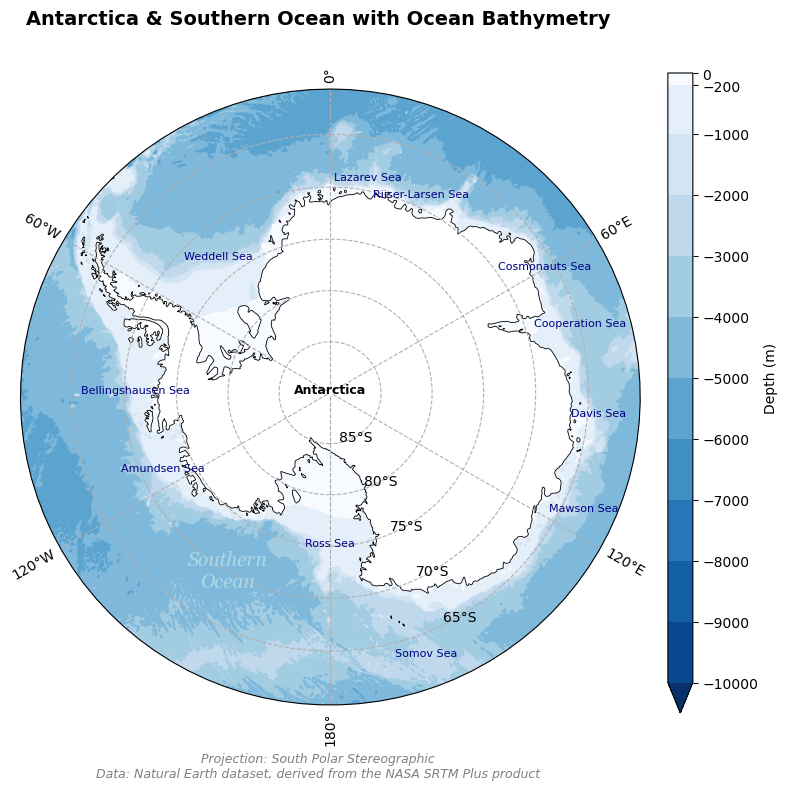

In [3]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())


depths_str, shp_dict = load_bathymetry('https://naturalearth.s3.amazonaws.com/' + '10m_physical/ne_10m_bathymetry_all.zip', (-180, -90, 180, -60))


depths = np.array([int(d) for d in depths_str])
N = len(depths)
nudge = 0.01  # shift bin edge slightly to include data
boundaries = [min(depths)] + sorted(depths+nudge)  # low to high
norm = matplotlib.colors.BoundaryNorm(boundaries, N)
blues_cm = matplotlib.colormaps['Blues_r'].resampled(N)
colors_depths = blues_cm(norm(depths))


for i, depth_str in enumerate(depths_str):
    ax.add_geometries(shp_dict[depth_str].geometries(),
                        crs=ccrs.PlateCarree(),
                        color=colors_depths[i])


ax.add_feature(cfeature.LAND, facecolor="white")
ax.coastlines(linewidth=0.6)
ax.gridlines(draw_labels=True, linestyle="--")


axi = fig.add_axes([0.85, 0.1, 0.025, 0.8])
ax.add_feature(cfeature.BORDERS, linestyle=':')
sm = plt.cm.ScalarMappable(cmap=blues_cm, norm=norm)
fig.colorbar(mappable=sm,
                cax=axi,
                spacing='proportional',
                extend='min',
                ticks=depths,
                label='Depth (m)')


ax.set_rasterized(True)

#setting circular boundary
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)


antarctic_seas = {
    "Weddell Sea": (-40, -73),
    "Ross Sea": (180, -75),
    "Amundsen Sea": (-115, -72),
    "Bellingshausen Sea": (-90, -71),
    "Lazarev Sea": (10, -69),
    "Riiser-Larsen Sea": (25, -69),
    "Cosmonauts Sea": (60, -66),
    "Cooperation Sea": (75, -65),
    "Davis Sea": (95, -64),
    "Mawson Sea": (115, -63),
    "Somov Sea": (160, -63),
}

for name, (lon, lat) in antarctic_seas.items():
    ax.text(lon, lat, name, transform=ccrs.PlateCarree(),
            fontsize=8, color="navy", ha="center")


text = ax.text(-150, -70, "Southern\nOcean", transform=ccrs.PlateCarree(),
              color="#ADD8E6", fontstyle="italic", fontsize=14, fontname="Georgia", fontweight="light", multialignment="center", ha="center", va="center")


ax.text(0, -90, "Antarctica", transform=ccrs.PlateCarree(),
        fontsize=9, color="black", fontweight='bold', ha="center")

fig.suptitle("Antarctica & Southern Ocean with Ocean Bathymetry", fontsize=14, fontweight="bold")
fig.text(0.5, 0.02, "Projection: South Polar Stereographic\nData: Natural Earth dataset, derived from the NASA SRTM Plus product", 
         fontsize=9, color="gray", fontstyle="italic", ha="center")
plt.show()

*Figure 1:* Map of the continent Antarctica with its surrounding seas and the Southern Ocean. Natural Earth shape files were used to plot ocean bathymetry, with a colour scale to indicate depth. The South Polar Stereographic projection was used because it preserves shapes and angles at the South Pole, minimising distortion. Its circular layout works perfectly for clearly showing the continent of Antarctica, since it is located on the South Pole. It is the standard choice for Antarctic maps by NASA and other scientific organisations.

The South Atlantic, from 20°S to 50°S. The map should show the following locations: Walvis Bay, Cape Town, Rio de Janeiro, Montevideo

In [4]:
from geopy.geocoders import Nominatim
plt.clf() 

<Figure size 640x480 with 0 Axes>

/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/set_operations.py:131: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packag

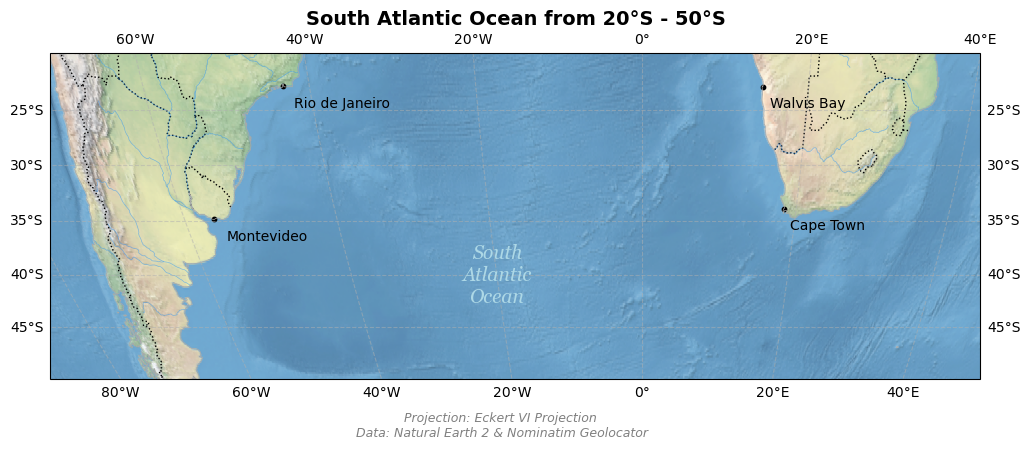

In [5]:
extent = [-70, 40, -50, -20] # 20°S - 50°S south atlantic 
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.EckertVI())

ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)

img = plt.imread('resources/natural-earth-2/global.png')
ax.imshow(img, origin='upper',
          extent=[-180, 180, -90, 90],
          transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, color="dodgerblue", linewidth=0.5, alpha=0.5)
ax.coastlines(linewidth=0.5, color="darkgray", resolution="50m")

geolocator = Nominatim(user_agent='educational') 
place = ['Walvis Bay','Cape Town','Rio de Janeiro','Montevideo']
address = []
for p in place:
    loc = geolocator.geocode(p,language="en")
    address.append(loc)

for p in range(len(place)):
    ax.scatter(address[p].longitude, address[p].latitude, color="black", marker="o", s=10, transform=ccrs.PlateCarree(), alpha=1.0)
    ax.text(address[p].longitude + 1, address[p].latitude - 1.5, place[p], transform=ccrs.PlateCarree(),fontsize=10, color="black", ha="left", va="center")


ax.text(-20, -40, "South\nAtlantic\nOcean", transform=ccrs.PlateCarree(), 
        color="#ADD8E6", fontstyle="italic", fontsize=14, fontname="Georgia", fontweight="light", multialignment="center", ha="center", va="center")


ax.set_title("South Atlantic Ocean from 20°S - 50°S", fontsize=14, fontweight="bold")
fig.text(0.5, 0.22, "Projection: Eckert VI Projection\n Data: Natural Earth 2 & Nominatim Geolocator", 
         fontsize=9, color="gray", fontstyle="italic", ha="center")
plt.show()

*Figure 2:* Map of the South Atlantic with the surrounding continents South America and Africa. Coastal cities Rio de Janeiro (Brazil), Montevideo (Uruguay), Walvis Bay (Namibia), and Cape Town (South Africa) labelled. Eckert VI is a pseudocylindrical, and equal-area projection that is commonly chosen for world maps. It maintains correct ocean proportions and gives a more aesthetically balanced view of the South Atlantic and these corresponding cities than a projection like Mercator which is used for ocean navigation or the PlateCaree projection. It minimizes distortion of the ocean in particular, hence why it was chosen here. An overlay image was used from Natural Earth 2 to provide land and ocean topography. Nominatim geolocator was used to plot the points of the cities shown.

A series of 3 panels showing the use of different coastline resolutions from the GSHHG database in a map of False Bay. Display the coarse, intermediate and full resolution.

/var/folders/kh/ytjkxqrx3h34rrg9h6fkzb540000gn/T/ipykernel_79177/65387358.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/opt/anaconda3/envs/AOS/lib/python3.12/site-packages/shapely/predicates.py:778: R

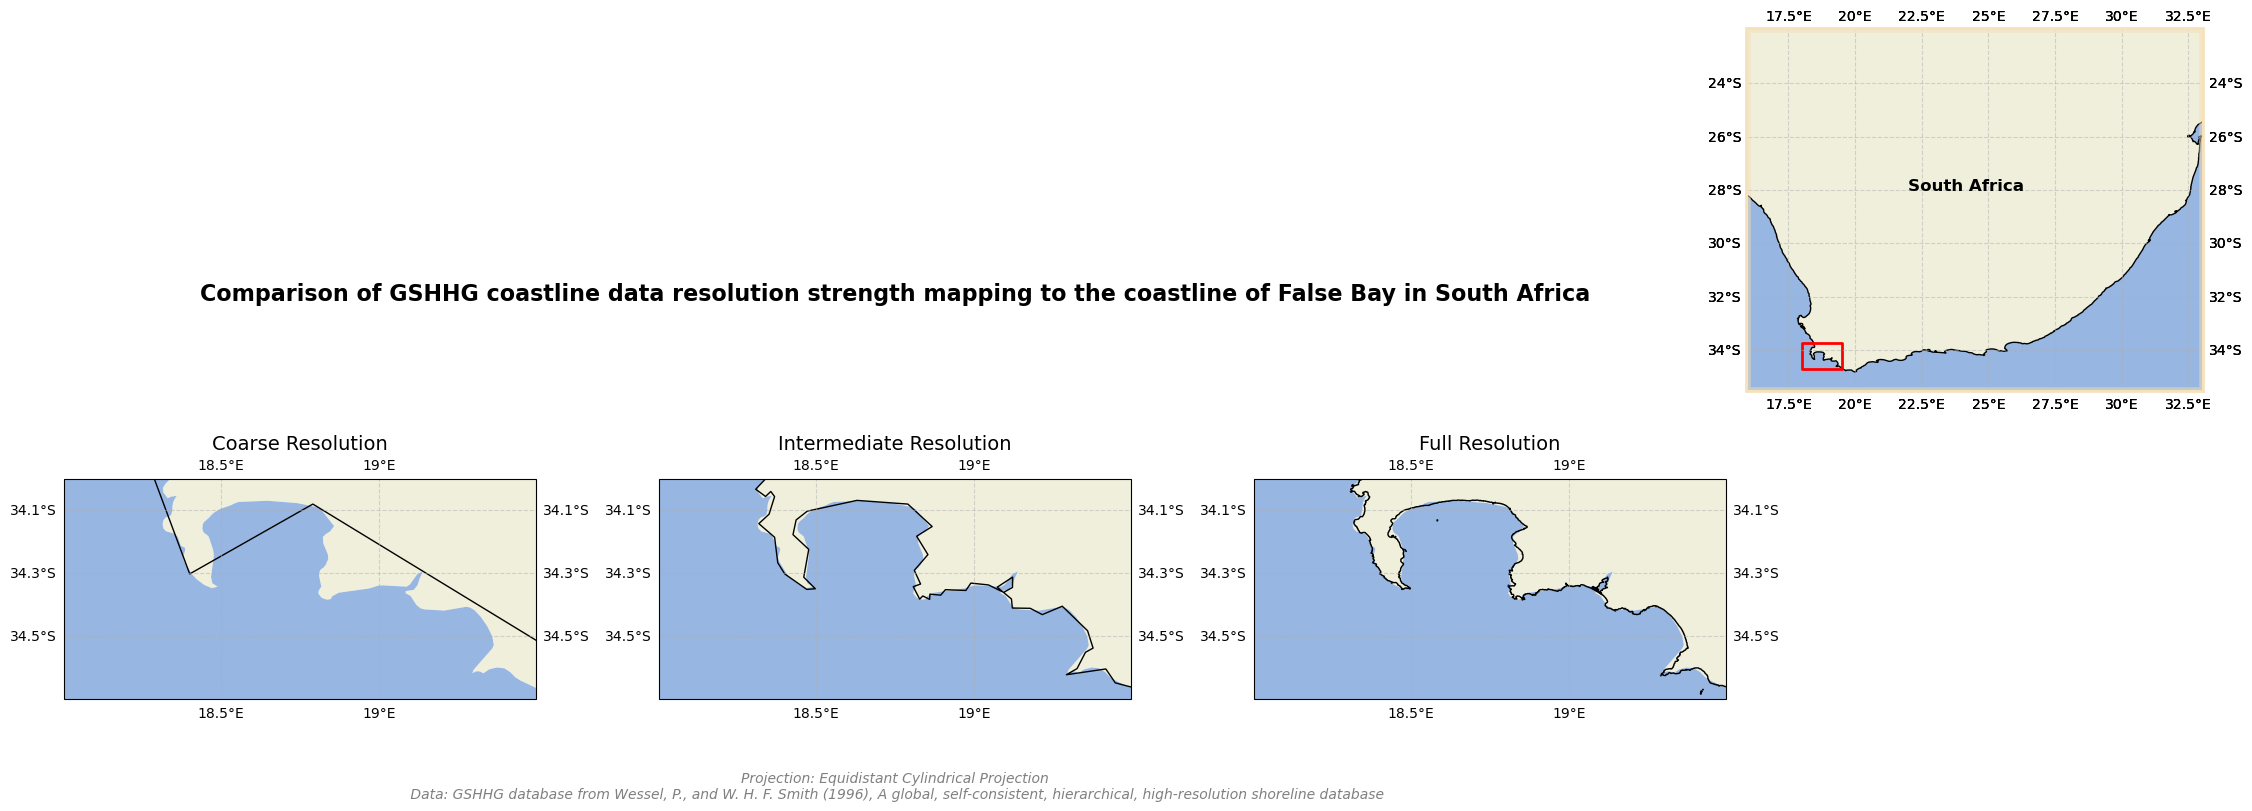

In [7]:
import matplotlib.ticker as mticker
from matplotlib.patheffects import Stroke
import shapely.geometry as sgeom


extent = [18.0, 19.5, -34.7, -34.0] #extent of False Bay
resolutions = ['coarse', 'intermediate', 'full']
plot_titles = ['Coarse Resolution', 'Intermediate Resolution', 'Full Resolution']


fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})


for ax, res, title in zip(axes, resolutions, plot_titles):
    ax.set_extent(extent, crs=ccrs.PlateCarree())  
    
    #using GSHHG dataset, levels[1]=coastline data
    gshhs_coast = cfeature.GSHHSFeature(scale=res, levels=[1], edgecolor='black')
    ax.add_feature(gshhs_coast, linewidth=1)

    #add land, ocean & gridlines to each plot
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    gridlines = ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)
    gridlines.xlocator = mticker.FixedLocator([18.0, 18.5, 19.0, 19.5])  
    gridlines.ylocator = mticker.FixedLocator([-34.7, -34.5, -34.3, -34.1]) 

    #plot label
    ax.set_title(title, fontsize=14)

    #insert graph of SA with zoomed out view of False Bay
    sub_ax = fig.add_axes([0.8, 0.8, 0.6, 0.6], projection=ccrs.PlateCarree())
    sub_ax.set_extent([16, 33, -35.5, -22])  #extent to capture zoomed in area clearly

    effect = Stroke(linewidth=4, foreground='wheat', alpha=0.5)
    sub_ax.spines['geo'].set_path_effects([effect])

    sub_ax.add_feature(cfeature.LAND)
    sub_ax.add_feature(cfeature.OCEAN)
    sub_ax.coastlines()
    sub_ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)
    sub_ax.text(22, -28, "South Africa", fontsize=12, color="black", fontweight='bold')
    extent_box = sgeom.box(extent[0], extent[2], extent[1], extent[3]+0.25)
    sub_ax.add_geometries([extent_box], ccrs.PlateCarree(), facecolor='none',
                          edgecolor='red', linewidth=2)

fig.suptitle("Comparison of GSHHG coastline data resolution strength mapping to the coastline of False Bay in South Africa",
             fontsize=16, fontweight='bold')
fig.text(0.5, 0.12, "Projection: Equidistant Cylindrical Projection\n Data: GSHHG database from Wessel, P., and W. H. F. Smith (1996), A global, self-consistent, hierarchical, high-resolution shoreline database", 
         fontsize=10, color="gray", fontstyle="italic", ha="center")


plt.tight_layout()
plt.show()




*Figure 3:* This figure shows a comparison of the resolution strength of the GSHHG database. Their geographic data comes in five resolutions: crude(c), low(l), intermediate(i), high(h), and full(f). Since this plot is very zoomed in, PlateCarree projection was chosen because distortion at this size is minimal & will maintain correct distances and relative positioning. This makes it easier to compare resolution of GSHHG data. Furthermore, the GSHHG dataset used here to compare resolution mappings of the coastline, uses longitude-latitude coordinates, so using PlateCarree avoids re transforming these.